#Compare Time Series Growth Rate


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
#Normalizing a Single series
google = pd.read_csv('google.csv', parse_dates= ['Date'], index_col= 'Date')
google.head()

,Close
Date,
2014-01-02,556.00
2014-01-03,551.95
2014-01-04,NaN
2014-01-05,NaN
2014-01-06,558.10


In [5]:
first_price = google['Close'].iloc[0]
first_price

556.0

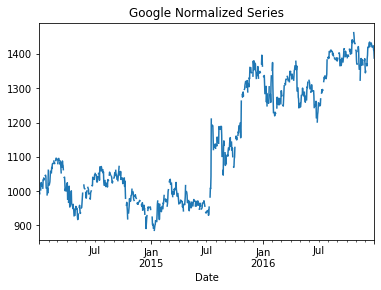

In [6]:
normalized = google['Close'].div(first_price).mul(1000)
normalized.plot(title= 'Google Normalized Series')

In [8]:
#Normalizing Multiple Series
prices = pd.read_csv('stock_data.csv', parse_dates= ['Date'],index_col='Date')
prices.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1762 entries, 2010-01-04 to 2016-12-30
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    1761 non-null   float64
 1   AMGN    1761 non-null   float64
 2   AMZN    1761 non-null   float64
 3   CPRT    1761 non-null   float64
 4   EL      1762 non-null   float64
 5   GS      1762 non-null   float64
 6   ILMN    1761 non-null   float64
 7   MA      1762 non-null   float64
 8   PAA     1762 non-null   float64
 9   RIO     1762 non-null   float64
 10  TEF     1762 non-null   float64
 11  UPS     1762 non-null   float64
dtypes: float64(12)
memory usage: 179.0 KB


In [9]:
prices.head()

,AAPL,AMGN,AMZN,CPRT,EL,GS,ILMN,MA,PAA,RIO,TEF,UPS
Date,,,,,,,,,,,,
2010-01-04,30.57,57.72,133.90,4.55,24.27,173.08,30.55,25.68,27.00,56.03,28.55,58.18
2010-01-05,30.63,57.22,134.69,4.55,24.18,176.14,30.35,25.61,27.30,56.90,28.53,58.28
2010-01-06,30.14,56.79,132.25,4.53,24.25,174.26,32.22,25.56,27.29,58.64,28.23,57.85
2010-01-07,30.08,56.27,130.00,4.50,24.56,177.67,32.77,25.39,26.96,58.65,27.75,57.41
2010-01-08,30.28,56.77,133.52,4.52,24.66,174.31,33.15,25.40,27.05,59.30,27.57,60.17


In [10]:
prices.iloc[0]

AAPL     30.57
AMGN     57.72
AMZN    133.90
CPRT      4.55
EL       24.27
GS      173.08
ILMN     30.55
MA       25.68
PAA      27.00
RIO      56.03
TEF      28.55
UPS      58.18
Name: 2010-01-04 00:00:00, dtype: float64

In [11]:
normalized_M = prices.div(prices.iloc[0])

In [12]:
#Comparing with a BanchMark
index =pd.read_csv('sp500.csv', parse_dates= ['date'],index_col='date')
index.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2395 entries, 2007-06-29 to 2016-12-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SP500   2395 non-null   float64
dtypes: float64(1)
memory usage: 37.4 KB


In [13]:
index.head()

,SP500
date,
2007-06-29,1503.35
2007-07-02,1519.43
2007-07-03,1524.87
2007-07-05,1525.40
2007-07-06,1530.44


In [14]:
prices= pd.concat([prices,index],axis=1).dropna()
prices.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1761 entries, 2010-01-04 to 2016-12-30
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    1761 non-null   float64
 1   AMGN    1761 non-null   float64
 2   AMZN    1761 non-null   float64
 3   CPRT    1761 non-null   float64
 4   EL      1761 non-null   float64
 5   GS      1761 non-null   float64
 6   ILMN    1761 non-null   float64
 7   MA      1761 non-null   float64
 8   PAA     1761 non-null   float64
 9   RIO     1761 non-null   float64
 10  TEF     1761 non-null   float64
 11  UPS     1761 non-null   float64
 12  SP500   1761 non-null   float64
dtypes: float64(13)
memory usage: 192.6 KB


In [15]:
prices.head(2)

,AAPL,AMGN,AMZN,CPRT,EL,GS,ILMN,MA,PAA,RIO,TEF,UPS,SP500
2010-01-04,30.57,57.72,133.90,4.55,24.27,173.08,30.55,25.68,27.0,56.03,28.55,58.18,1132.99
2010-01-05,30.63,57.22,134.69,4.55,24.18,176.14,30.35,25.61,27.3,56.90,28.53,58.28,1136.52


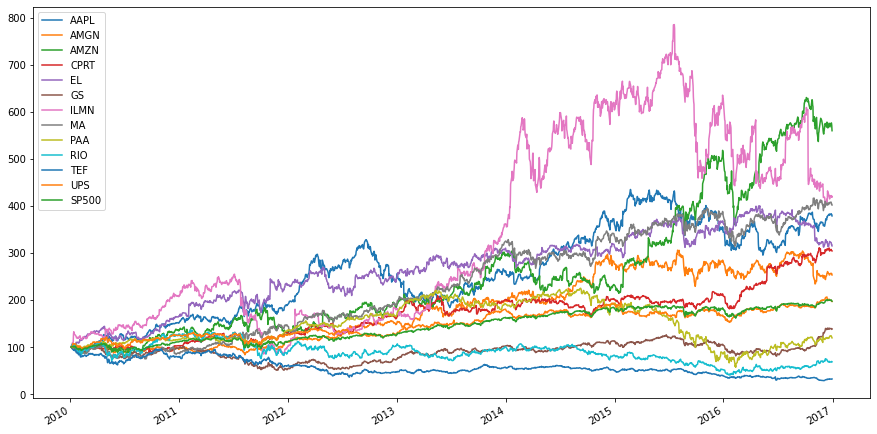

In [16]:
normalized_B =prices.div(prices.iloc[0]).mul(100)
normalized_B.plot(figsize=(15,8))

In [17]:
#plotting Performance Difference
diff = normalized_B.sub(normalized_B['SP500'],axis=0)   #.sub(..., axis=0) : Subtract a Series from each DataFrame column by aligning indexes

diff.head()

,AAPL,AMGN,AMZN,CPRT,EL,GS,ILMN,MA,PAA,RIO,TEF,UPS,SP500
2010-01-04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
2010-01-05,-0.115294,-1.177816,0.278428,-0.311565,-0.682393,1.456404,-0.966229,-0.584151,0.799546,1.241175,-0.381618,-0.139685,0.0
2010-01-06,-1.772895,-1.977514,-1.598550,-0.805848,-0.448694,0.315478,5.100161,-0.833577,0.707787,4.291931,-1.487128,-0.933493,0.0
2010-01-07,-2.370758,-3.280007,-3.680501,-1.866781,0.427011,1.884073,6.498896,-1.897163,-0.916028,3.908187,-3.569981,-2.091359,0.0
2010-01-08,-2.006904,-2.704138,-1.342056,-1.717602,0.548660,-0.347608,7.452377,-2.148604,-0.873077,4.777897,-4.490836,2.362158,0.0


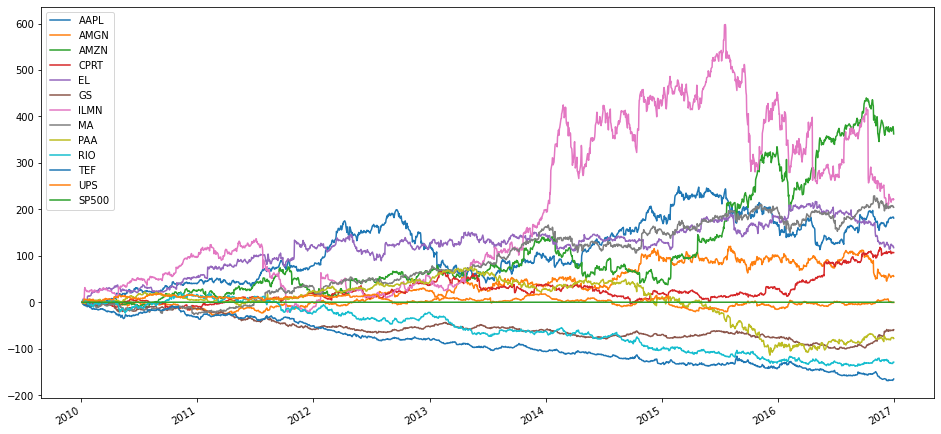

In [18]:
diff.plot(figsize=(16,8))

#Changing the time series frequency; Resampling

In [19]:
#quarterly Data
dates= pd.date_range(start= '2022',periods=4,freq='Q')
data= range(1,5)
quarterly = pd.Series(data= data,index=dates)
quarterly

2022-03-31    1
2022-06-30    2
2022-09-30    3
2022-12-31    4
Freq: Q-DEC, dtype: int64

In [20]:
#upsampling--> Querterly=>Monlthly
monthly= quarterly.asfreq('M')
monthly

2022-03-31    1.0
2022-04-30    NaN
2022-05-31    NaN
2022-06-30    2.0
2022-07-31    NaN
2022-08-31    NaN
2022-09-30    3.0
2022-10-31    NaN
2022-11-30    NaN
2022-12-31    4.0
Freq: M, dtype: float64

In [21]:
 #upsampling creates missing value
 monthly =monthly.to_frame('baseline') #to DataFrame
 monthly

,baseline
2022-03-31,1.0
2022-04-30,NaN
2022-05-31,NaN
2022-06-30,2.0
2022-07-31,NaN
2022-08-31,NaN
2022-09-30,3.0
2022-10-31,NaN
2022-11-30,NaN
2022-12-31,4.0


In [22]:
#upsampling: Fill Method
monthly['ffill']= quarterly.asfreq('M',method='ffill') #forward fill
monthly['bfill']= quarterly.asfreq('M',method='bfill') #back fill
monthly['value']=quarterly.asfreq('M',fill_value=0)

In [23]:
monthly

,baseline,ffill,bfill,value
2022-03-31,1.0,1,1,1
2022-04-30,NaN,1,2,0
2022-05-31,NaN,1,2,0
2022-06-30,2.0,2,2,2
2022-07-31,NaN,2,3,0
2022-08-31,NaN,2,3,0
2022-09-30,3.0,3,3,3
2022-10-31,NaN,3,4,0
2022-11-30,NaN,3,4,0
2022-12-31,4.0,4,4,4


#Unsampling & interpolation with.resample()

In [24]:
unrate = pd.read_csv('unrate.csv',parse_dates=['DATE'],index_col='DATE')
unrate.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 85 entries, 2010-01-01 to 2017-01-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   UNRATE  85 non-null     float64
dtypes: float64(1)
memory usage: 1.3 KB


In [25]:
unrate.head()

,UNRATE
DATE,
2010-01-01,9.8
2010-02-01,9.8
2010-03-01,9.9
2010-04-01,9.9
2010-05-01,9.6


In [26]:
#Assign frequency with,resample()
unrate.asfreq('MS').info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 85 entries, 2010-01-01 to 2017-01-01
Freq: MS
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   UNRATE  85 non-null     float64
dtypes: float64(1)
memory usage: 1.3 KB


In [27]:
unrate.resample('MS') #creates Resampler object

In [28]:
#  .resample(): returns data only when calling another method
unrate.asfreq('MS').equals(unrate.resample('MS').asfreq())

True

In [29]:
#Quarterly real GDP growth
gdp = pd.read_csv('gdp_growth.csv',parse_dates=['date'],index_col='date')
gdp.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 41 entries, 2007-01-01 to 2017-01-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   gdp_growth  41 non-null     float64
dtypes: float64(1)
memory usage: 656.0 bytes


In [30]:
gdp.head()

,gdp_growth
date,
2007-01-01,0.2
2007-04-01,3.1
2007-07-01,2.7
2007-10-01,1.4
2008-01-01,-2.7


In [31]:
#interpolate Monthly real GDP growth
gdp_1= gdp.resample('MS').ffill().add_suffix('_ffill')
gdp_1.head(10)

,gdp_growth_ffill
date,
2007-01-01,0.2
2007-02-01,0.2
2007-03-01,0.2
2007-04-01,3.1
2007-05-01,3.1
2007-06-01,3.1
2007-07-01,2.7
2007-08-01,2.7
2007-09-01,2.7


In [32]:
gdp_2= gdp.resample('MS').interpolate().add_suffix('_inter')   #interpolate(): finds points on straight line between existing data
gdp_2.head(10)

,gdp_growth_inter
date,
2007-01-01,0.200000
2007-02-01,1.166667
2007-03-01,2.133333
2007-04-01,3.100000
2007-05-01,2.966667
2007-06-01,2.833333
2007-07-01,2.700000
2007-08-01,2.266667
2007-09-01,1.833333


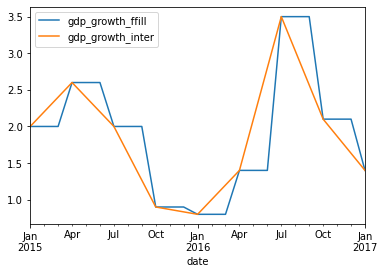

In [33]:
pd.concat([gdp_1,gdp_2], axis=1).loc['2015':].plot() # axis=1: Cocncatenate horizontally

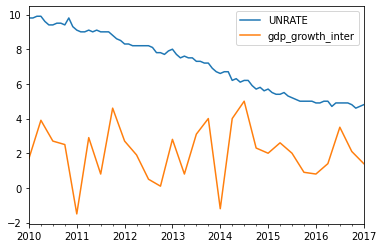

In [34]:
#Combine GDP Growth & unemployment
pd.concat([unrate,gdp_2.loc['2010':]],axis=1).plot();

#Downsampling & Aggregation

> hours to day,
 
> day to month etc



In [36]:
#air quality daily Ozone levels
ozone = pd.read_csv('ozone_nyc.csv',parse_dates=['date'],index_col='date')
ozone.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6291 entries, 2000-01-01 to 2017-03-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Ozone   6167 non-null   float64
dtypes: float64(1)
memory usage: 98.3 KB


In [37]:
ozone= ozone.resample('D').asfreq()
ozone.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6300 entries, 2000-01-01 to 2017-03-31
Freq: D
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Ozone   6167 non-null   float64
dtypes: float64(1)
memory usage: 98.4 KB


In [38]:
#Creating Monthly Ozone Data
ozone.resample('M').mean().head()

,Ozone
date,
2000-01-31,0.010443
2000-02-29,0.011817
2000-03-31,0.016810
2000-04-30,0.019413
2000-05-31,0.026535


In [39]:
ozone.resample('M').agg(['mean','std']).head()

Ozone          
                mean       std
date                          
2000-01-31  0.010443  0.004755
2000-02-29  0.011817  0.004072
2000-03-31  0.016810  0.004977
2000-04-30  0.019413  0.006574
2000-05-31  0.026535  0.008409

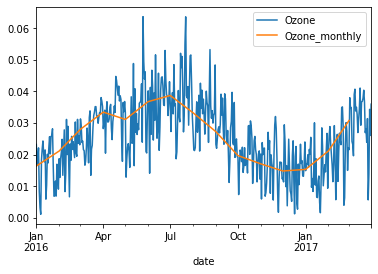

In [41]:
#plotting resampled Ozone Data
ozone= ozone.loc['2016':]
ax= ozone.plot()
monthly =ozone.resample('M').mean()
monthly.add_suffix('_monthly').plot(ax=ax)   # ax=ax: Matplotlib let's you plot again on the axes object returned by the first plot

In [44]:
#Resampling Multiple time series
data= pd.read_csv('ozone_nyla.csv',parse_dates=['date'],index_col='date')
data= data.resample('D').asfreq()
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6300 entries, 2000-01-01 to 2017-03-31
Freq: D
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Los Angeles  5488 non-null   float64
 1   New York     6167 non-null   float64
dtypes: float64(2)
memory usage: 147.7 KB


In [45]:
data= data.resample('BM').mean()
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 207 entries, 2000-01-31 to 2017-03-31
Freq: BM
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Los Angeles  200 non-null    float64
 1   New York     207 non-null    float64
dtypes: float64(2)
memory usage: 4.9 KB


In [49]:
data.head(5)

,Los Angeles,New York
date,,
2000-01-31,0.004734,0.010443
2000-02-29,0.009648,0.011817
2000-03-31,0.016694,0.016810
2000-04-28,0.019598,0.018955
2000-05-31,0.025653,0.026492
